In [2]:
from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
import numpy as np
from qiskit import Aer,QuantumCircuit,execute #simulation_machine_backend, code, run code on sim_mach
from qiskit.tools.visualization import plot_histogram

In [4]:
backend=Aer.get_backend("qasm_simulator")
quantum_instance=QuantumInstance(backend,shots=100)

In [15]:
my_shor=Shor(N=27,a=2,quantum_instance=quantum_instance)
Shor.run(my_shor)

{'factors': [3], 'total_counts': 0, 'successful_counts': 0}

In [17]:
"""
convert factor problem into period-finding problem using modular-exponentiation-function
naively: divide the number by guess number a, then computing the remainder
for good guesses of a ==> the remainder is periodic with power of a 

then we use quantum fourier tranform to find period


once we have period we can find factors as:

N=>trying to factor
a=>guess
r=period of mod exp function

p=a^(r/2) -1
q=a^(r/2)+1



"""
#
""

''

In [60]:
def c_amod15(a,power):#modular exponention
    U=QuantumCircuit(4)
    for interation in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    U=U.to_gate()
    U.name='%i^%i mod 12'%(a,power)
    c_U=U.control()
    return c_U

def qft_dagger(n):#quantum foureier transform
    qc=QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit,n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)),m,j)
        qc.h(j)
    qc.name="QFT dagger"
    return qc

In [61]:
n_count=8#number of qubit
a=7



In [62]:
#solve factoring using quantum shor


qc=QuantumCircuit(n_count+4,n_count)

#prepare qbits

for q in range(n_count):
    qc.h(q)
qc.x(3+n_count)


#modular exponentiation
for q in  range(n_count):
    qc.append(c_amod15(a,2**q),[q]+[i+n_count for i in range(4)])

#quantum foureier transform 
qc.append(qft_dagger(n_count),range(n_count))


#measure
qc.measure(range(n_count),range(n_count))

C:\Users\sud4d\AppData\Local\Temp/ipykernel_16864/3253818677.py:20: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)),m,j)


In [63]:
#qc.draw()

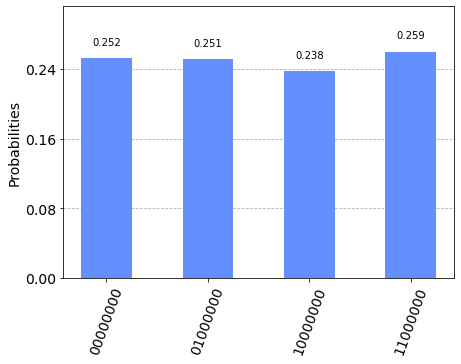

In [64]:
backend=Aer.get_backend("qasm_simulator")
results=execute(qc,backend,shots=2048).result()
plot_histogram(results.get_counts())

In [41]:
"""
so we get 0, 2, 4...

now we get options for r=1,2,4
use them to get p,q
p,q, will have common factors with N
"""
#
""

''

In [43]:
"""

Given a funcion that is periodic find its period
strict def: f(x)
f(x)=f(y) for xnot equal y iff |x-y|=kp  where  p is period

classically: O(exp c n^1/3 logn^2/3)  n=#bits needed to descibe period
quantum: shor  O(n^2 logn loglogn)

reason why work:
1)quantum fourier transform
2)modular exponential

"""
#

""

''

In [53]:
"""
quantum fourier transform:

            Effectively a change of basis from computational basis to fourier basis

    eg 
        1-qubit: comp basis{|0>,|1>} ######## foureier basis{|+>,|->}   ====> for 1qubit happens by hadamard gate
        2-qubit: comp basis{00,01,10,11} ####### foureier basis {.......}
        
    in computational basis=> each qubit on blochspehere moves between north and south 00->01->10->11
    in fourier basis eachqubit rotates continously on bloch sphere==> coordinated circles are mapped on blochsperere in fourere basis

"""
#
"""
Build qft

nqubits:  N=2^n states comp basis
|X> fourier transform of |x> (compbasis)

|X>=(1/\sqrt (N))\sum_{y=0}^{y=N-1}  e^(2pi x*y/N)|y>      say y=4=00000100  8qubit
"""
#
"""
|X>=(1/\sqrt (N))\sum_{y=0}^{y=N-1}  e^(2pi x*y/N)|y> 
N=2^n      y=[y1 y2 y3 ....]       y=2^(n-1)y1 +2^(n-2)y2 +2^(n-3)y3 ......

y=\sum_{k=1}^{n} yk 2^(n-k)

|X>=(1/\sqrt (N))\sum_{y=0}^{y=N-1} \product_k  e^(2pi x*yk /2^k) |y1 y2 ....yn>
|X>=(1/\sqrt (N))(|0>+e^(2pi x/2)|1>)(|0>+e^(2pi x/2^2)|1>)(|0>+e^(2pi x/2^3)|1>)......
"""
#
"""
Quantum circuit for qft:
        two ingredients
                1) H|xk>=|+> or |-> when xk=0 or 1
                2) Urotk|xj>= (e^2pi i xj/2^k)|xj>  xj=0==> |xj>->urotk|xj>=urotk|0>=|0>    xj=1===>|xj>->urotk|xj>=e^2pi i /2 |1>
                        Urotk=[[1 0][0 e^(2pi i /(2^k))]]
            

-H--U-U-U--------------
----.-----H-U--U-------
------.-----.----H--U--
--------.------.----.--

"""
noqub=3
qc=QuantumCircuit(noqub)


In [54]:
"""
Quantum phase estimation:

        using qft to do something useful (quantum foureier transform)
    problem: unitary matrix have eigenvalues as e^(i theta)
                U|psi>=e^(i theta) |psi>
                
                can we extract theta, if we have ability to prepare |psi> and apply U ? theta is global phase
                
    solution: yes use QPE
    QPE trick==>
    
    |0>------H-------.----H----measure
    |psi>------------U---------
    
    
    
    step0: |0>|psi>
    step1: (|0>+|1>)|psi>
    step2:  (|0>|psi>+ (ph)|1>|psi>)    ph=e^(i theta)
    step3:   {|0>(1+ph) +|1>(1-ph)}|psi>
    
    
    prob of measuring ==> |0> |1>

theta
1                        0.999 0.000
10                       0.992 0.007

we have encoded the phase in the prob difference between 0 and 1 states



above we were having capability to prepare |psi> and use U then using 1qubit we could extract theta /phase info
we can use multiple qubit to extract


000 -----H--.---.---.-------------------H--- measureall3
    -----H-------------.--.--.----------H---
    -----H----------------------.--.--.-H---
    
    --------U_4---U_2----U_1---U_4-u_2-u_1--u_4--u_2--u_1------

"""
#
"""
"""

'\n'

In [56]:
"""
Shors

problem: N=p*q  p,q are prime and large


5~ 2(mod 3)

x= 1 2 3 4 5 6 7 8 9 
x~ 1 2 0 1 2 0 1 2 0   (mod 3)
x~0(mod3) ==> x is multiple of 3
x~1(mod3) ==> x is (multiple_of3 +1)

x~y(mod N) means y is one of {0,1,....N-1}

shors algo protocol:
N= p*q
1)pick 'a' such that coprime with N
2)find the 'order' r of the function a^r (mod N)      order is period     smallest r such that a^r ~1(mod N)
3) if r is even : good news
        x~a^(r/2) (mod N)
        if x+1 not~ 0(mod N) :good news
            {p,q} contained in {gcd(x+1,N),gcd(x-1,N)}
    else
        find another 'a'


"""
#
""

''

In [65]:
"""
example: factor 15

    N=15   in binary = 1111 in binary==>4 bits
    
    
    1) pick a=13
    2)period (13^r) mod 15
                        x = 0 1 2 3 4 5 6 7.....
             13^x (mod 15)= 1 13 4 7 1 13 4 7...
             
             r= smallestnumber such that a^r~1(mod N)
             
             here r=4
             period =r =4
    3)if r is even:
            x ~a^r/2 (mod N)= 13^(4/2) (mod 15)=4(mod15)
            x+1=5
            x-1=3
            
            
U_f{a,N}
==>f(x)_{a,N} =a^x (mod N)

|x>|w>--U_f---|x>|w+f(x)>

circuit for factoring N=pq=15
|0000>---H---|          -------------
    -----H---|          -------------QFT_dag  measure
    -----H---|          -------------
    -----H---|          -------------
|0000>          U_f{a,N}
    _________|          _____
    _________|          ______measure
    _________|          ______
    _________|          _____

"""
#
""

''